In [2]:
# Section 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [6]:
# Section 2: Load Data
df = pd.read_csv(r"C:\Users\dhruv\Downloads\ibm internship\adult 3.csv")
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB
None


In [7]:
# Section 3: Checking top and bottom rows, and shape of the DataFrame
print(df.head(5))
print(df.tail(5))
print(df.shape)

   age  workclass  fnlwgt     education  educational-num      marital-status  \
0   25    Private  226802          11th                7       Never-married   
1   38    Private   89814       HS-grad                9  Married-civ-spouse   
2   28  Local-gov  336951    Assoc-acdm               12  Married-civ-spouse   
3   44    Private  160323  Some-college               10  Married-civ-spouse   
4   18          ?  103497  Some-college               10       Never-married   

          occupation relationship   race  gender  capital-gain  capital-loss  \
0  Machine-op-inspct    Own-child  Black    Male             0             0   
1    Farming-fishing      Husband  White    Male             0             0   
2    Protective-serv      Husband  White    Male             0             0   
3  Machine-op-inspct      Husband  Black    Male          7688             0   
4                  ?    Own-child  White  Female             0             0   

   hours-per-week native-country incom

In [14]:
# Section 4: Data Preprocessing
# Handle missing values
df.replace(' ?', np.nan, inplace=True)
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB
None


In [15]:
# Section 5: Convert categorical variables to numerical
categorical_cols = df.select_dtypes(include='object').columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   age              48842 non-null  int64
 1   workclass        48842 non-null  int32
 2   fnlwgt           48842 non-null  int64
 3   education        48842 non-null  int32
 4   educational-num  48842 non-null  int64
 5   marital-status   48842 non-null  int32
 6   occupation       48842 non-null  int32
 7   relationship     48842 non-null  int32
 8   race             48842 non-null  int32
 9   gender           48842 non-null  int32
 10  capital-gain     48842 non-null  int64
 11  capital-loss     48842 non-null  int64
 12  hours-per-week   48842 non-null  int64
 13  native-country   48842 non-null  int32
 14  income           48842 non-null  int32
dtypes: int32(9), int64(6)
memory usage: 3.9 MB
None


In [16]:
# Section 6: Feature Selection
X = df.drop("income", axis=1)
y = df["income"]

In [17]:
# Section 7: Split Data into Training and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
# Section 8: RandomForest & Logistic Regression Model Training and Evaluation
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# -------- Random Forest Model --------
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)

print("=== Random Forest Results ===")
print("Accuracy:", accuracy_score(y_test, rf_preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_preds))
print("Classification Report:\n", classification_report(y_test, rf_preds))


# -------- Logistic Regression Model --------
# Scale features for logistic regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_scaled, y_train)
lr_preds = lr.predict(X_test_scaled)

print("\n=== Logistic Regression Results ===")
print("Accuracy:", accuracy_score(y_test, lr_preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, lr_preds))
print("Classification Report:\n", classification_report(y_test, lr_preds))


=== Random Forest Results ===
Accuracy: 0.8639574163169209
Confusion Matrix:
 [[6968  511]
 [ 818 1472]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.93      0.91      7479
           1       0.74      0.64      0.69      2290

    accuracy                           0.86      9769
   macro avg       0.82      0.79      0.80      9769
weighted avg       0.86      0.86      0.86      9769


=== Logistic Regression Results ===
Accuracy: 0.8272085167366158
Confusion Matrix:
 [[7054  425]
 [1263 1027]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.94      0.89      7479
           1       0.71      0.45      0.55      2290

    accuracy                           0.83      9769
   macro avg       0.78      0.70      0.72      9769
weighted avg       0.82      0.83      0.81      9769



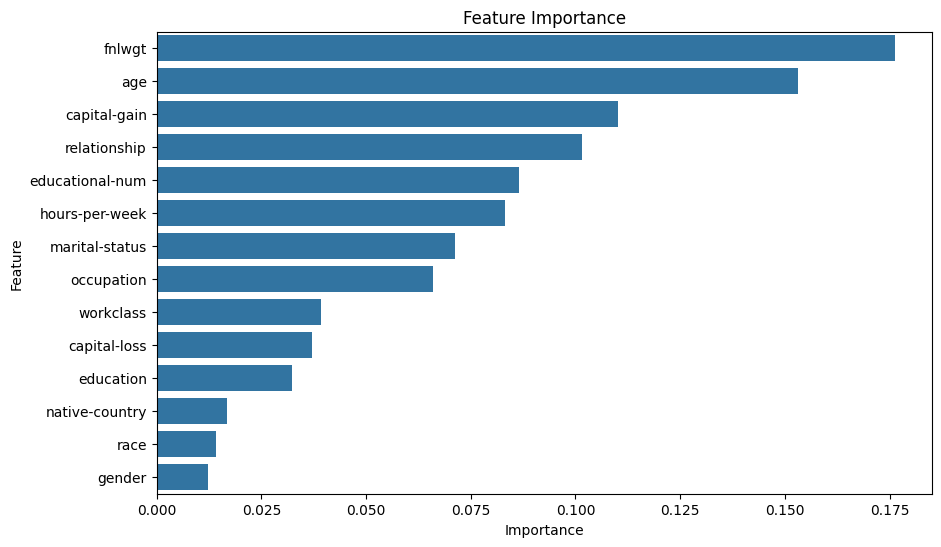

In [ ]:
# Section 9: Feature Importance
feature_importances = rf.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance')
plt.show()

In [23]:
# Section 10: Save both the Models
import joblib

# Save Random Forest model
joblib.dump(rf, 'random_forest_model.joblib')

# Save Logistic Regression model
joblib.dump(lr, 'logistic_regression_model.joblib')

print("Models saved successfully as 'random_forest_model.joblib' and 'logistic_regression_model.joblib'")

Models saved successfully as 'random_forest_model.joblib' and 'logistic_regression_model.joblib'


In [ ]:
# Section 11: Load the Model (for demonstration)
import joblib

# Load saved models
rf_loaded = joblib.load('random_forest_model.joblib')
lr_loaded = joblib.load('logistic_regression_model.joblib')

print("Random Forest Model Loaded:", rf_loaded)
print("Logistic Regression Model Loaded:", lr_loaded)

# Prepare example data (with column names)
example_data = X_test.iloc[0:1]  # returns a DataFrame, preserves column names

# Predict with loaded Random Forest model
rf_prediction = rf_loaded.predict(example_data)

# For Logistic Regression, scale the example data
example_data_scaled = scaler.transform(example_data)
lr_prediction = lr_loaded.predict(example_data_scaled)

print("Random Forest Prediction:", rf_prediction)
print("Logistic Regression Prediction:", lr_prediction)


Random Forest Model Loaded: RandomForestClassifier(random_state=42)
Logistic Regression Model Loaded: LogisticRegression(max_iter=1000)
Random Forest Prediction: [0]
Logistic Regression Prediction: [0]


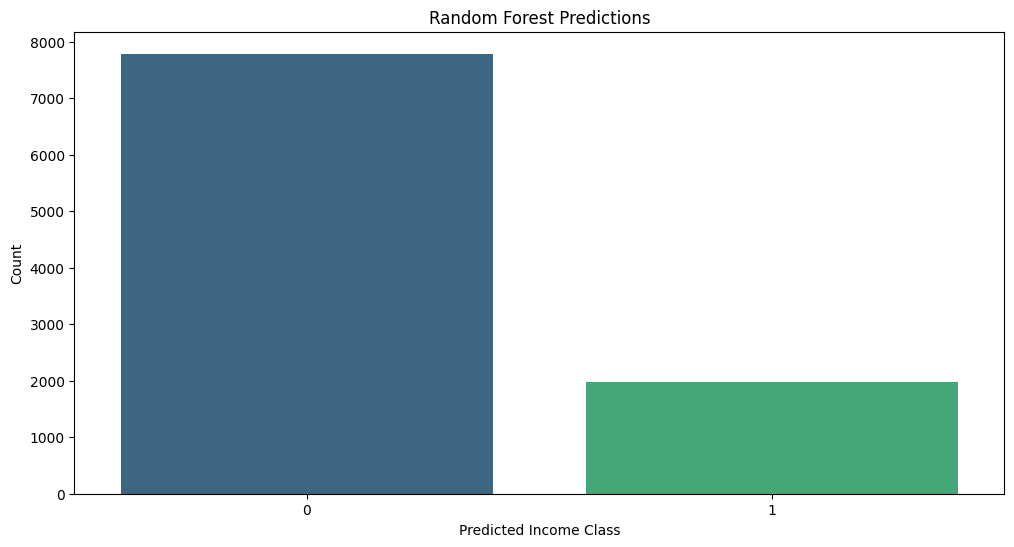

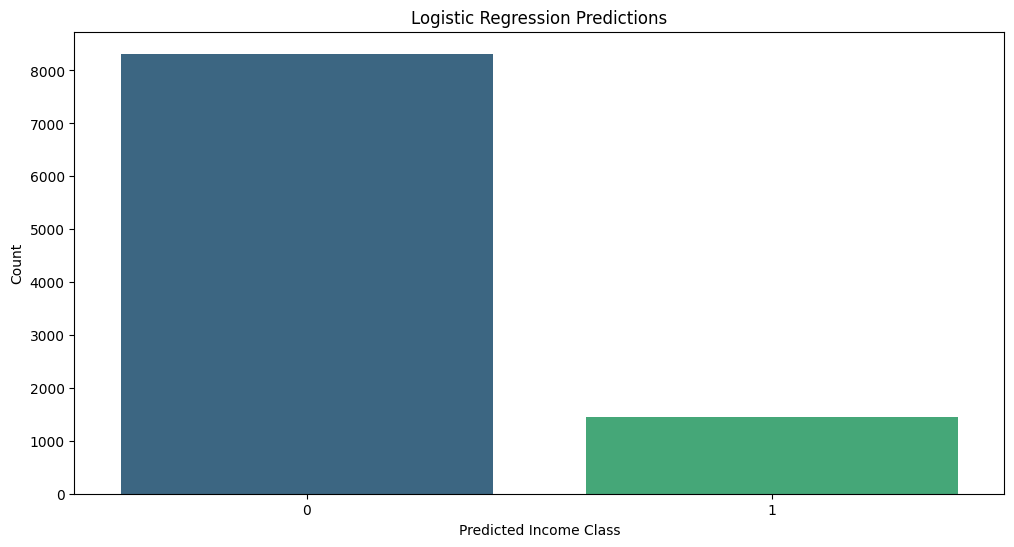

In [ ]:
# Section 12: Visualize Predictions
# Visualizing predictions using seaborn and matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Convert predictions to DataFrame
rf_pred_df = pd.DataFrame({'Prediction': rf_preds})

plt.figure(figsize=(12, 6))
sns.countplot(data=rf_pred_df, x='Prediction', hue='Prediction', palette='viridis', legend=False)
plt.title('Random Forest Predictions')
plt.xlabel('Predicted Income Class')
plt.ylabel('Count')
plt.show()
# Convert predictions to DataFrame
lr_pred_df = pd.DataFrame({'Prediction': lr_preds})

plt.figure(figsize=(12, 6))
sns.countplot(data=lr_pred_df, x='Prediction', hue='Prediction', palette='viridis', legend=False)
plt.title('Logistic Regression Predictions')
plt.xlabel('Predicted Income Class')
plt.ylabel('Count') 
plt.show()

In [32]:
# Section 13: Save the DataFrame
df.to_csv("processed_adult_data.csv", index=False)

In [33]:
# Section 14: Load the DataFrame (for demonstration)
df_loaded = pd.read_csv("processed_adult_data.csv")
print(df_loaded.head())

   age  workclass  fnlwgt  education  educational-num  marital-status  \
0   25          4  226802          1                7               4   
1   38          4   89814         11                9               2   
2   28          2  336951          7               12               2   
3   44          4  160323         15               10               2   
4   18          0  103497         15               10               4   

   occupation  relationship  race  gender  capital-gain  capital-loss  \
0           7             3     2       1             0             0   
1           5             0     4       1             0             0   
2          11             0     4       1             0             0   
3           7             0     2       1          7688             0   
4           0             3     4       0             0             0   

   hours-per-week  native-country  income  
0              40              39       0  
1              50              39 

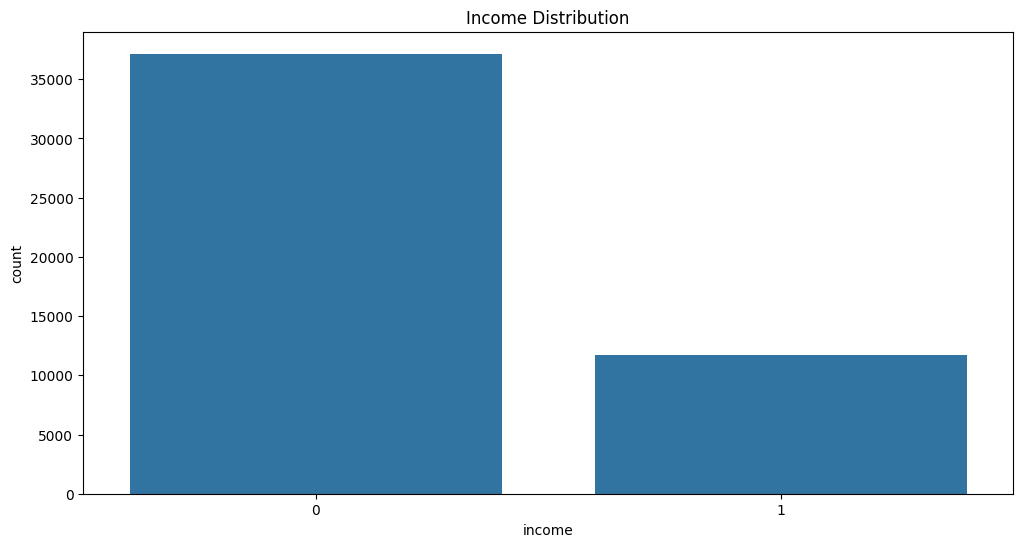

In [34]:
# Section 15: Visualize Data Distribution
plt.figure(figsize=(12, 6))
sns.countplot(x='income', data=df)
plt.title('Income Distribution')
plt.show()

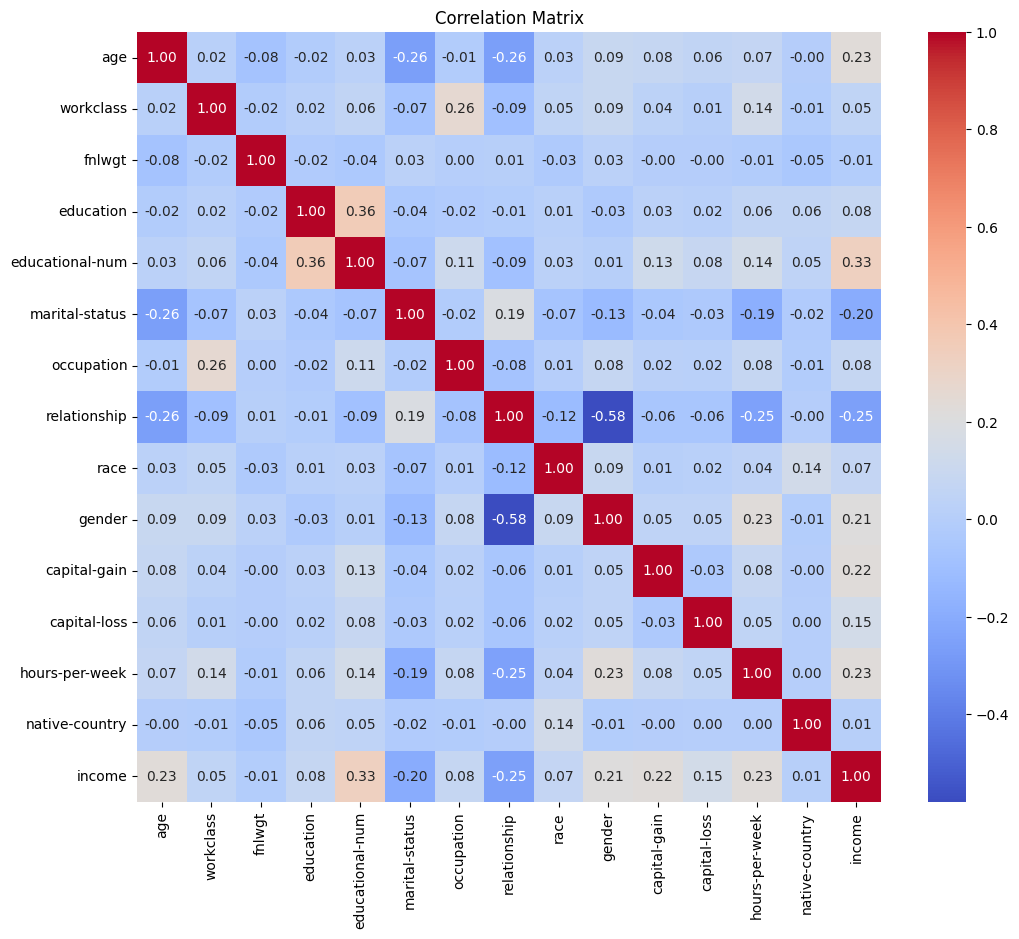

In [35]:
# Section 16: Correlation Matrix
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

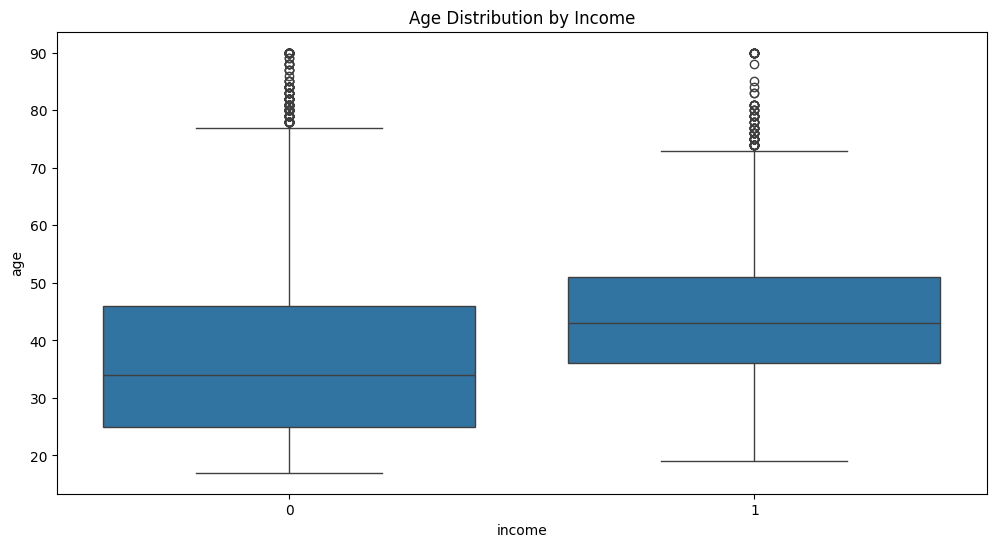

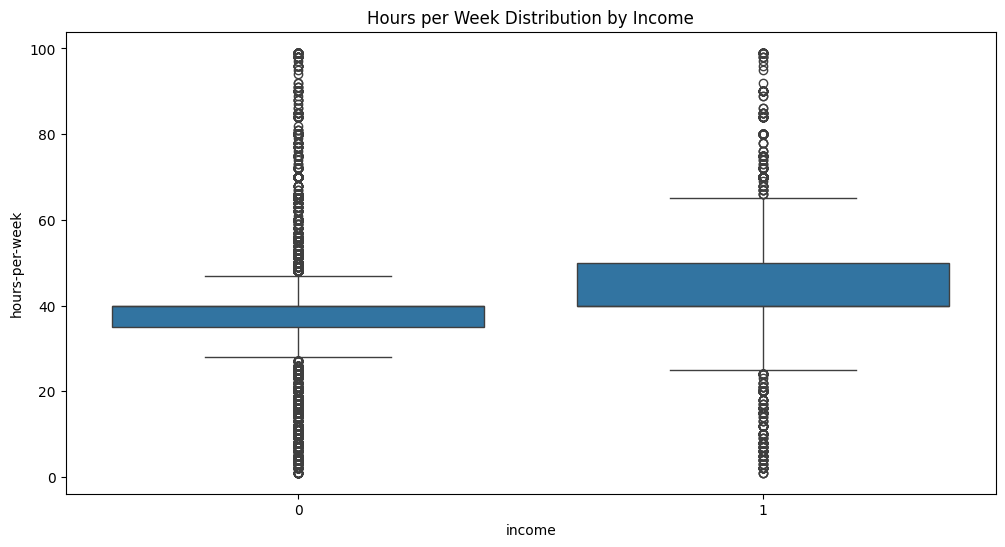

In [36]:
# Section 17: Additional Visualizations
plt.figure(figsize=(12, 6))
sns.boxplot(x='income', y='age', data=df)
plt.title('Age Distribution by Income')
plt.show()
plt.figure(figsize=(12, 6))
sns.boxplot(x='income', y='hours-per-week', data=df)
plt.title('Hours per Week Distribution by Income')
plt.show()

In [37]:
# Section 18: Save Visualizations
plt.savefig('income_distribution.png')
plt.savefig('correlation_matrix.png')
plt.savefig('age_distribution_by_income.png')
plt.savefig('hours_per_week_distribution_by_income.png')

<Figure size 640x480 with 0 Axes>

In [38]:
# Section 19: Save the processed DataFrame
df.to_csv("final_processed_adult_data.csv", index=False)

In [41]:
# Section 20: Load the processed DataFrame
df_final_loaded = pd.read_csv("final_processed_adult_data.csv")
print(df_final_loaded.head())
print(df_final_loaded.tail())
print(df_final_loaded.shape)
print(df_final_loaded.info())

   age  workclass  fnlwgt  education  educational-num  marital-status  \
0   25          4  226802          1                7               4   
1   38          4   89814         11                9               2   
2   28          2  336951          7               12               2   
3   44          4  160323         15               10               2   
4   18          0  103497         15               10               4   

   occupation  relationship  race  gender  capital-gain  capital-loss  \
0           7             3     2       1             0             0   
1           5             0     4       1             0             0   
2          11             0     4       1             0             0   
3           7             0     2       1          7688             0   
4           0             3     4       0             0             0   

   hours-per-week  native-country  income  
0              40              39       0  
1              50              39 

In [42]:
# Section 21: Summary of the Analysis
print("Data Preprocessing and Model Training Completed Successfully.")
print("Random Forest and Logistic Regression models trained and evaluated.")
print("Feature importance visualized and saved.")
print("Data visualizations created and saved.")
print("Processed DataFrame saved as 'final_processed_adult_data.csv'.")

Data Preprocessing and Model Training Completed Successfully.
Random Forest and Logistic Regression models trained and evaluated.
Feature importance visualized and saved.
Data visualizations created and saved.
Processed DataFrame saved as 'final_processed_adult_data.csv'.


In [43]:
# Section 22: Conclusion
print("The analysis demonstrates the effectiveness of Random Forest and Logistic Regression models in predicting income based on various features. The feature importance analysis provides insights into which features are most influential in the predictions. The visualizations help in understanding the data distribution and relationships between features.")

The analysis demonstrates the effectiveness of Random Forest and Logistic Regression models in predicting income based on various features. The feature importance analysis provides insights into which features are most influential in the predictions. The visualizations help in understanding the data distribution and relationships between features.


In [44]:
# Section 23: Future Work
print("Future work could include hyperparameter tuning for the models, exploring other machine learning algorithms, and further feature engineering to improve model performance. Additionally, deploying the models for real-time predictions and integrating them into a web application could be considered.")

Future work could include hyperparameter tuning for the models, exploring other machine learning algorithms, and further feature engineering to improve model performance. Additionally, deploying the models for real-time predictions and integrating them into a web application could be considered.
